Google Colab Notebook link:

https://colab.research.google.com/drive/1f_FHYz6L7k17V264YSYrl6L2PM_vFGeL?usp=sharing

Team 9 : Dian Jin / Min Xu / Mingze Wu / Kunjingyi Chen

# Predicting Real Estate Prices in Beijing: An Analytical Approach Using Supervised Machine Learning

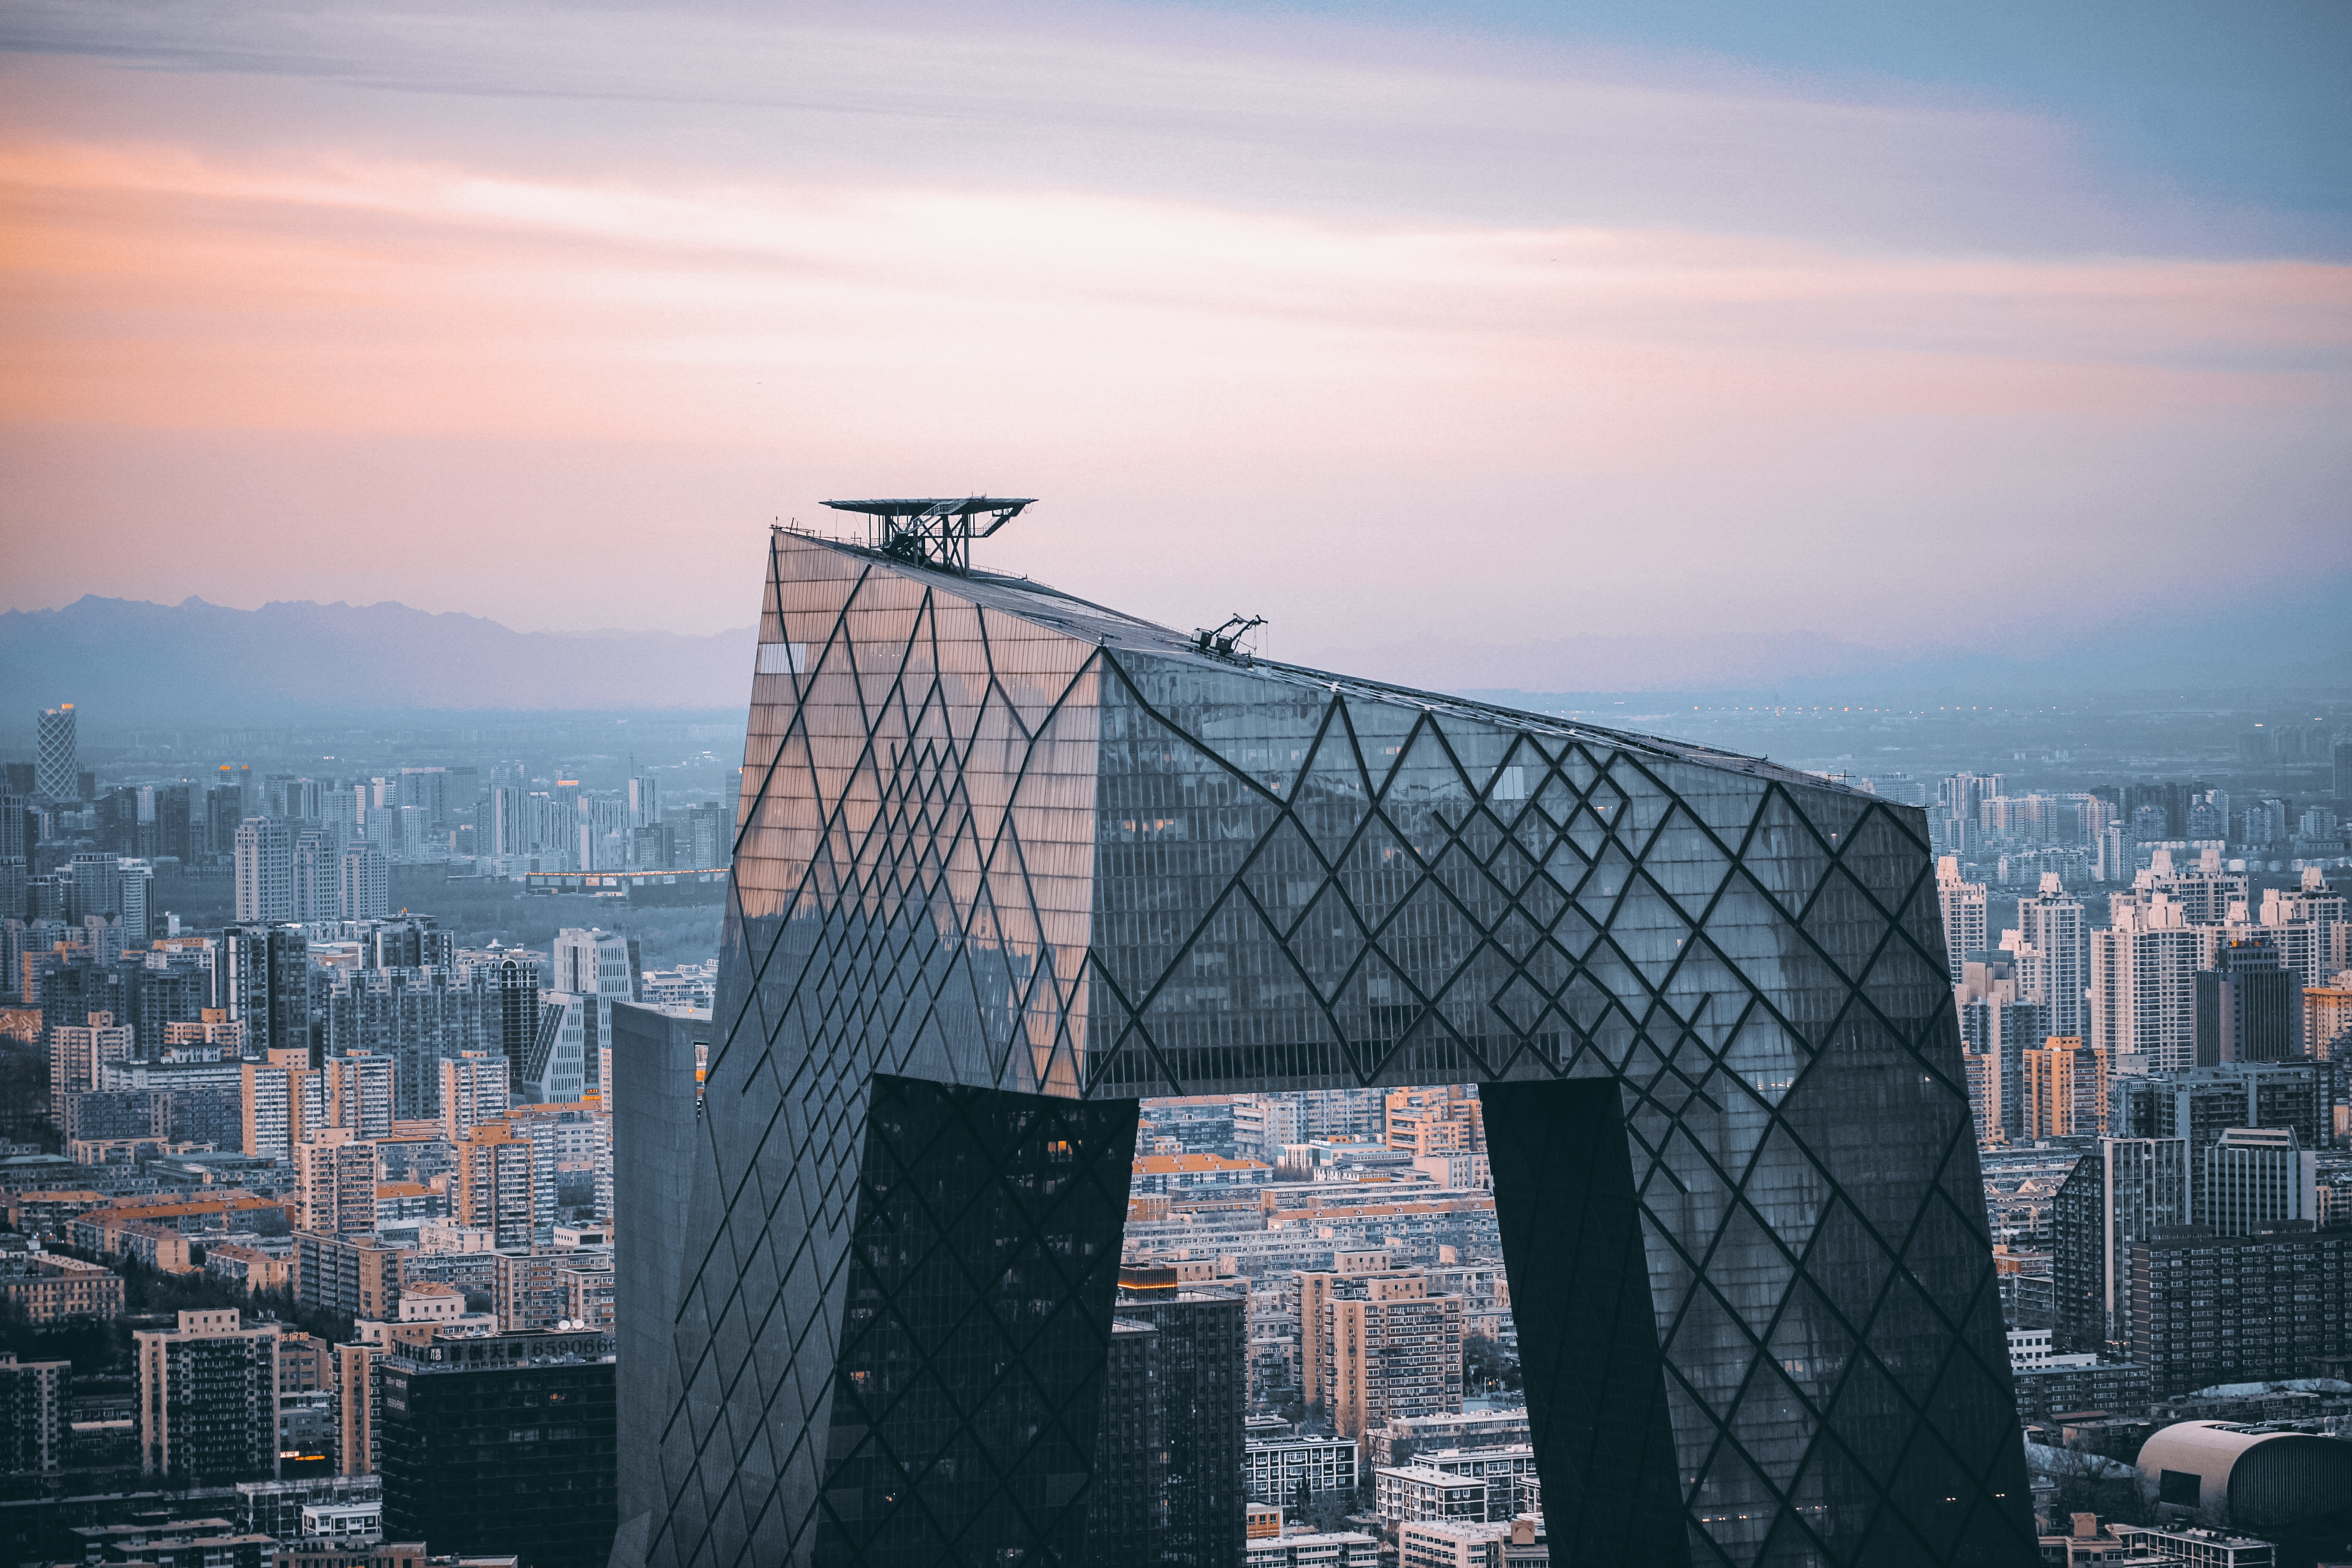

# Executive Summary

The analysis aims at predicting real estate prices in Beijing with a systematic approach.

The data cleaning and transformation process, coupled with in-depth Exploratory Data Analysis (EDA), revealed valuable patterns and relationships crucial for understanding the dynamic real estate market.

Leveraging scikit-learn pipelines facilitated efficient preprocessing. The predictive modeling stage encompassed various regression models, with a focus on fine-tuning high-performing ones. Ensemble methods, such as stacking and voting, were explored for their potential benefits, and validated through cross-validation.

Our project aims to tackle a significant real-world problem in the realm of real estate by predicting property prices based on historical sales data. We propose to develop a predictive model that can accurately estimate the total price of properties in Beijing, thus providing valuable insights for investors, buyers, and policy-makers.


# I. Business Problem Definition and Motivation



**Problem Definition:**

The prediction challenge is to estimate the total price of real estate properties in Beijing. This involves understanding the intricate relationships between various property features and their market valuations.


**Motivation:**

As the capital of China, Beijing's real estate market is highly representative and influential. Changes in housing prices here do not only reflect trends in China's urbanization and economic development, but also provide an important window into the dynamics of the global real estate market. We are excited about how we can leverage what we have learned so far to explore and uncover the deeper factors affecting house prices in such a dynamic and complex environment. By building an accurate predictive model, we hope to provide investors, buyers and policy-makers with valuable insights that will help them make more informed decisions in a complex market environment.

Second, since our team members are all of Chinese origin, we might have a deeper knowledge and understanding of Beijing's socio-economic context and real estate market, which can add a unique perspective and depth to our analysis. Also, as potential investors in the Beijing real estate market, we have great interest and curiosity in exploring the patterns and drivers of changes in Beijing's housing prices. This curiosity drives our motivation towards the prediction of housing price in Beijing.

---

# II. Data and Its Source

**Data Description**

The dataset contains various types of variables including integers, floating-point numbers, dates, and categorical data.

The dataset features 26 columns, encapsulating both numerical and categorical data points and we picked 18 columns from it. Notable variables include geographical features (district), property characteristics (number of living rooms, bathrooms), and transaction details (trade time, total price). The dataset reflects a rich composition of the Beijing real estate market with a diverse range of properties.

The original dataset comprises 318,851 entries, each representing a unique property transaction. And we will extract the most recent 200,000 entries from it.


**Data Source**

We download this dataset from Kaggle, and hers is the link: https://www.kaggle.com/datasets/ruiqurm/lianjia/data.

The primary data source for this project will be a dataset obtained from Lianjia.com, a leading real estate platform in China, covering housing transactions in Beijing from 2011 to 2017. All the data was fetching from here: https://bj.lianjia.com/

---

# III. Data Cleaning and Transformation

## A. Import Data

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import original dataset from the drive
sns.set(style="white")
house = pd.read_csv("/content/gdrive/MyDrive/BA810-B09-Team-Project/new.csv", encoding='ISO-8859-1')

## B. Tidy and Transform Data

**Keep Valuable Data**

In [ ]:
# Convert the 'tradeTime' column to datetime format
house['tradeTime'] = pd.to_datetime(house['tradeTime'])
house['constructionTime']=pd.to_datetime(house['tradeTime'])

# Sort the DataFrame by 'tradeTime' in descending order to get the most recent records
house_sorted = house.sort_values(by='tradeTime', ascending=False)

# Keep only the most recent 200,000 records
house_recent = house_sorted.head(200000)

# Drop the unnecessary columns
columns_to_drop = ['url', 'id', 'Lng','Lat', 'DOM', 'followers', 'Cid','constructionTime']
house_filtered = house_recent.drop(columns=columns_to_drop)

# Drop Null Values
house = house_filtered.dropna()

**Transform Numerical Data**

In [ ]:
# Convert the 'price' column to float64 format
house['price'] = house['price'].astype('float64')

In [ ]:
# Convert the 'livingroom', 'drawingroom', and 'bathroom' to int64 format
house['livingRoom'] = house['livingRoom'].astype(int)
house['drawingRoom'] = house['drawingRoom'].astype(int)
house['bathRoom'] = house['bathRoom'].astype(int)

# Convert 'floor' to int64 format
house['floor'] = house['floor'].str.extract('(\d+)', expand=False)
house['floor'] = pd.to_numeric(house['floor'], errors='coerce')

**Transform Categorical Data**

In [ ]:
#Convert the following columns to object format
house['buildingType'] = house['buildingType'].astype('object')
house['renovationCondition'] = house['renovationCondition'].astype('object')
house['buildingStructure'] = house['buildingStructure'].astype('object')
house['elevator'] = house['elevator'].astype('object')
house['fiveYearsProperty'] = house['fiveYearsProperty'].astype('object')
house['subway'] = house['subway'].astype('object')
house['district']=house['district'].astype('object')

**Updated Dataset**

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198246 entries, 90666 to 157008
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   tradeTime            198246 non-null  datetime64[ns]
 1   totalPrice           198246 non-null  float64       
 2   price                198246 non-null  float64       
 3   square               198246 non-null  float64       
 4   livingRoom           198246 non-null  int64         
 5   drawingRoom          198246 non-null  int64         
 6   kitchen              198246 non-null  int64         
 7   bathRoom             198246 non-null  int64         
 8   floor                198246 non-null  int64         
 9   buildingType         198246 non-null  object        
 10  renovationCondition  198246 non-null  object        
 11  buildingStructure    198246 non-null  object        
 12  ladderRatio          198246 non-null  float64       
 13  elevator  

**Dataset Overview**

|Index| Feature           | Description | Unit | Types of Data|
|:----------------| :---------------- | :--------| :----: | :--------|
|1|tradeTime|the time of transaction|/|/|
|2|totalPrice| the total price|in 10K Yuan|Numerical|
|3|price| the average price by square|Yuan|Numerical|
|4|square| the square of house|m²|Numerical|Numerical|
|5|livingRoom| the number of living room|/|Numerical|
|6|drawingRoom|the number of drawing room|/|Numerical|
|7|kitchen|the number of kitchen|/|Numerical|
|8|bathroom| the number of bathroom|/|Numerical|
|9|floor| the height of the house|/|Numerical|
|10|buildingType| including tower (1), bungalow (2), combination of plate and tower (3), plate(4)|/|Categorical|
|11|renovationCondition| including other (1), rough(2), simplicity (3), hardcover (4)|/|Categorical|
|12|buildingStructure|including unknow (1), mixed (2), brick and wood (3), brick and concrete (4), steel (5), and steel-concrete composite (6)|/|Categorical|
|13|ladderRatio|the proportion between number of residents on the same floor and number of elevator of ladder|/|Numerical|
|14|elevator|Availability of elevator, Yes (1) or No (0) |/|Categorical|
|15|fiveYearsProperty| if the owner have the property for less than 5 years|/|Categorical|
|16|subway|Is there a subway nearby, Yes (1) or No (0)|/|Categorical|
|17|district|district id|/|Numerical|
|18|communityAverage | the community average price by square|Yuan|Numerical|

In [ ]:
house.head()

,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
90666,2018-01-28,345.0,71577.0,48.20,1,1,1,1,6,4.0,4,2,0.50,0.0,0.0,1.0,7,71083.0
92208,2018-01-26,410.0,63468.0,64.60,2,1,1,1,25,1.0,1,6,0.25,1.0,0.0,1.0,2,60647.0
88701,2018-01-24,460.0,76159.0,60.40,2,1,1,1,6,4.0,3,2,0.50,0.0,1.0,1.0,8,78261.0
84247,2018-01-22,261.0,37244.0,70.08,2,1,1,1,22,1.0,4,6,0.20,1.0,1.0,1.0,7,39509.0
88369,2018-01-22,830.0,51096.0,162.44,4,2,1,2,8,4.0,4,6,0.50,1.0,1.0,0.0,8,63444.0


In [ ]:
# Summarizes the default numeric columns
house.describe()

,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,ladderRatio,communityAverage
count,198246.000000,198246.000000,198246.000000,198246.000000,198246.000000,198246.000000,198246.000000,198246.000000,1.982460e+05,198246.000000
mean,403.334430,50370.345207,83.138328,2.009942,1.146318,0.995712,1.186415,13.523552,5.087151e+01,63602.477649
std,244.645529,22841.512392,36.716430,0.773242,0.519686,0.095297,0.430524,7.883959,2.248049e+04,22135.980520
min,0.100000,1.000000,7.370000,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000e-02,10847.000000
25%,245.000000,33619.000000,57.940000,1.000000,1.000000,1.000000,1.000000,6.000000,2.500000e-01,46280.000000
50%,347.000000,45482.500000,74.290000,2.000000,1.000000,1.000000,1.000000,12.000000,3.330000e-01,59015.000000
75%,490.000000,62377.000000,98.300000,2.000000,1.000000,1.000000,1.000000,20.000000,5.000000e-01,75991.000000
max,4900.000000,150000.000000,640.000000,8.000000,5.000000,3.000000,7.000000,63.000000,1.000940e+07,183109.000000


In [ ]:
# Check the remaining categorical columns
house.describe(include=['object', 'category'])

,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district
count,198246.0,198246,198246,198246.0,198246.0,198246.0,198246
unique,4.0,4,6,2.0,2.0,2.0,13
top,4.0,4,6,1.0,1.0,1.0,7
freq,107582.0,101794,119318,116962.0,129820.0,119065.0,67956


---

# IV. EDA

In [ ]:
house.corr().round(3)

,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,ladderRatio,communityAverage
totalPrice,1.000,0.593,0.604,0.462,0.360,0.089,0.472,0.157,-0.001,0.483
price,0.593,1.000,-0.184,-0.083,-0.108,0.019,-0.084,-0.000,0.002,0.772
square,0.604,-0.184,1.000,0.724,0.609,0.092,0.737,0.161,-0.002,-0.130
livingRoom,0.462,-0.083,0.724,1.000,0.480,0.105,0.547,-0.086,-0.003,-0.048
drawingRoom,0.360,-0.108,0.609,0.480,1.000,0.136,0.504,0.021,-0.001,-0.079
kitchen,0.089,0.019,0.092,0.105,0.136,1.000,0.109,-0.034,0.000,0.015
bathRoom,0.472,-0.084,0.737,0.547,0.504,0.109,1.000,0.072,-0.001,-0.049
floor,0.157,-0.000,0.161,-0.086,0.021,-0.034,0.072,1.000,-0.000,0.035
ladderRatio,-0.001,0.002,-0.002,-0.003,-0.001,0.000,-0.001,-0.000,1.000,-0.001
communityAverage,0.483,0.772,-0.130,-0.048,-0.079,0.015,-0.049,0.035,-0.001,1.000


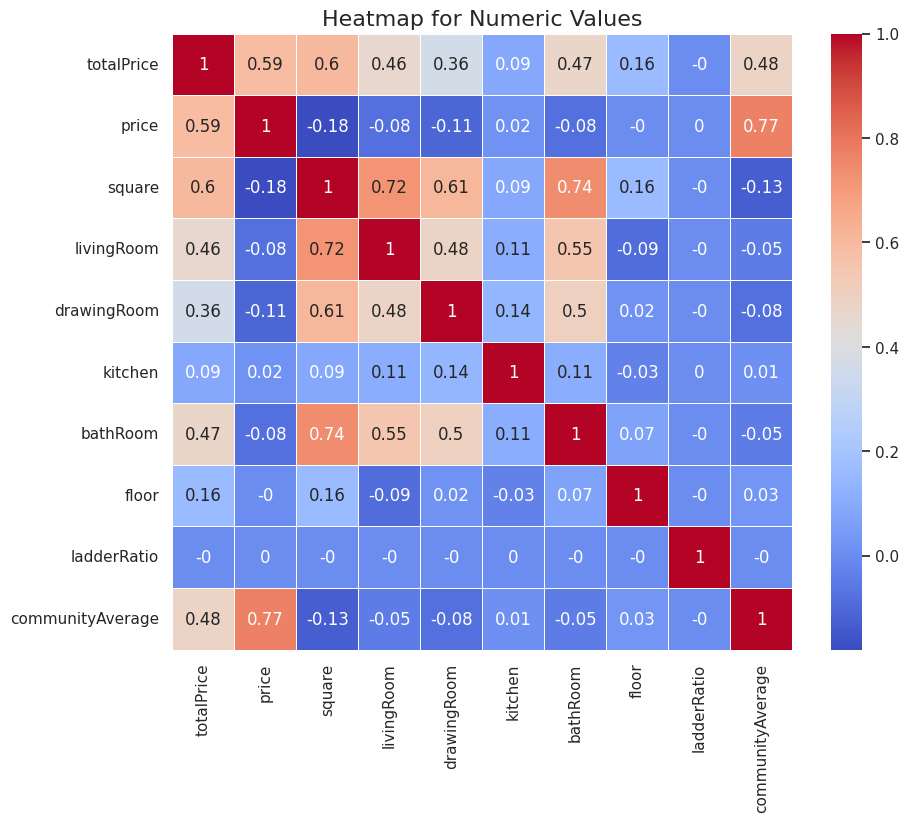

In [ ]:
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

correlation_matrix = round(house.corr(), 2)

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap for Numeric Values', fontsize=16, y=1)
plt.show()

**Insights:**

From the heat map, we can have a preliminary look at the correlation between different factors and the price of houses in Beijing:

- House Size and Total Price: There is a clear positive correlation between the total price and square (0.6), as well as between house size and the number of living spaces (living rooms at 0.72, bathrooms at 0.74). This indicates that larger houses tend to have more rooms and higher total prices. Also, there is a moderate positive correlation between the total price and the number of living spaces (living rooms at 0.46, bathrooms at 0.47), suggesting that houses with more rooms tend to be priced higher.

- Price and Community Average: There is a high positive correlation (0.77) between the unit price (price per square unit) and the community average price, demonstrating a strong influence of the community on individual house prices.

- Other Features: Features like the number of kitchens, ladder ratio, and floor level show low or insignificant correlations with most other features, indicating they have a lesser impact on the pricing dynamics compared to factors like house size, room count, and community average prices.

These summaries reveal the variety and complexity of factors that influence house prices in Beijing. It is important to note that correlation does not imply causation, and there may be other underlying factors that influence these relationships.

Text(0, 0.5, 'Frequency')

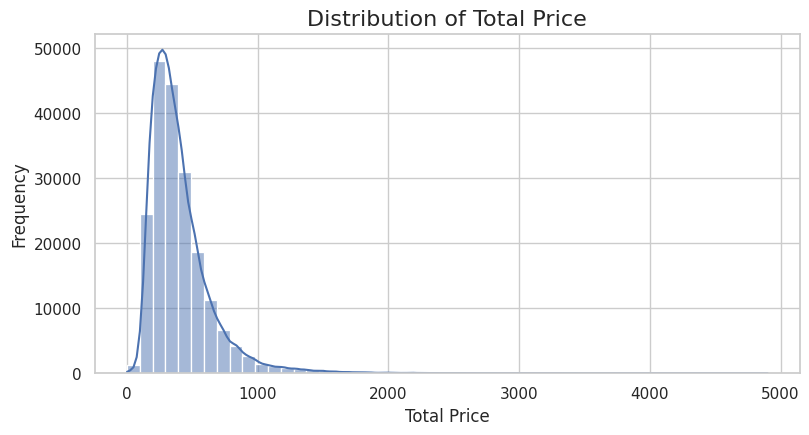

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(20, 15))

# Creating the histogram plot
plt.subplot(3, 2, 1)
sns.histplot(house['totalPrice'], bins=50, kde=True)

# Setting the title and labels with proper font sizes
plt.title('Distribution of Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

**Insights:**

It can be observed from the histgram that:

- Central Tendency: The highest frequency of house prices falls below the 10 millions, which could be indicative of the most common price segment for housing in Beijing.

- Skewness and Range: The distribution extends significantly towards the higher end, up to 50 millions, but such high-value transactions are rare. This reflects a market with a wide range of housing prices, but predominantly focused on the lower end.

- Outliers: The presence of house prices beyond the 30 millions is sparse, suggesting these are outliers, representing luxury or high-end properties.

- High-Value Transactions: Transactions above 20 millions are much less frequent, indicating that high-priced houses in Beijing form a smaller portion of the market.

- Mode of Distribution: The mode appears to be in the 2-3 millions price range, signaling this as the most frequently occurring price bracket for houses in the market.

This shows that from 2015 to 2018, the housing prices in Beijing exhibited a normal distribution, mostly concentrated between 1 and 10 million, with only a few outliers.

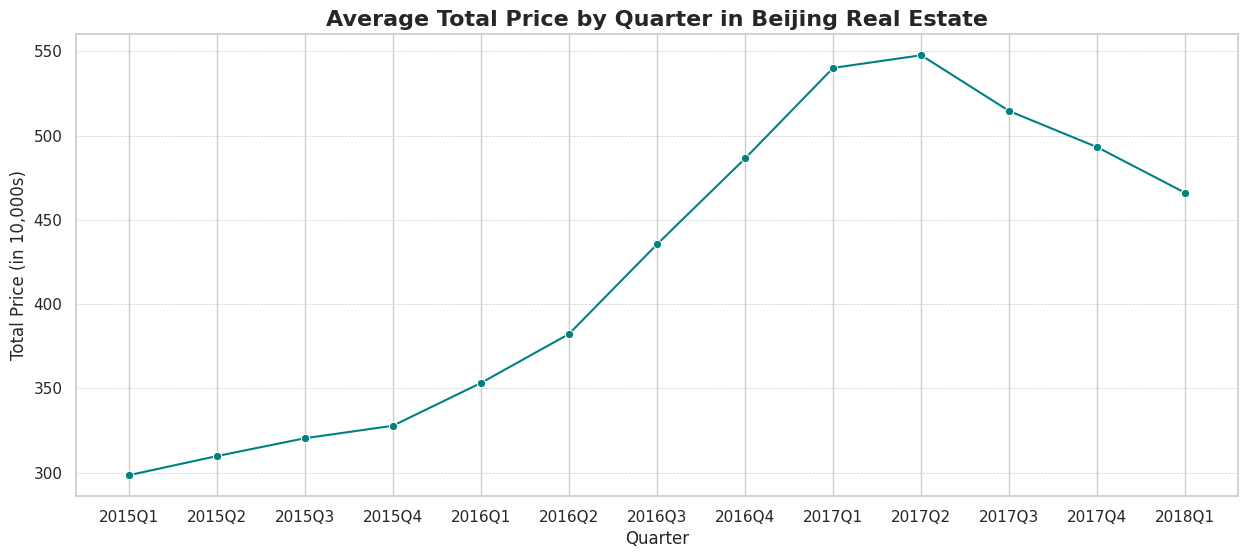

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
house['tradeTime'] = pd.to_datetime(house['tradeTime'])
house['quarter'] = house['tradeTime'].dt.to_period('Q')
quarterly_avg = house.groupby('quarter')['totalPrice'].mean().reset_index()
quarterly_avg['quarter'] = quarterly_avg['quarter'].astype(str)

sns.lineplot(x='quarter', y='totalPrice', data=quarterly_avg, marker='o', color='teal')

plt.title('Average Total Price by Quarter in Beijing Real Estate', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Price (in 10,000s)', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.show()

**Insights:**

The linechart shows us the price trend over time, we can see that:

- There is a clear upward trend in the average total price from the first quarter of 2015 until the third quarter of 2017, indicating a general increase in property values over this period.

- There is a downward trend in the average total price starting from the fourth quarter of 2017 to the first quarter of 2018. This could indicate a cooling of the market, a response to market corrections, policy changes, or increased supply.

- This trend provides a snapshot of the market dynamics over the three-year period and could be useful for us to understand longer-term price movements and potential future trends in the Beijing real estate market.

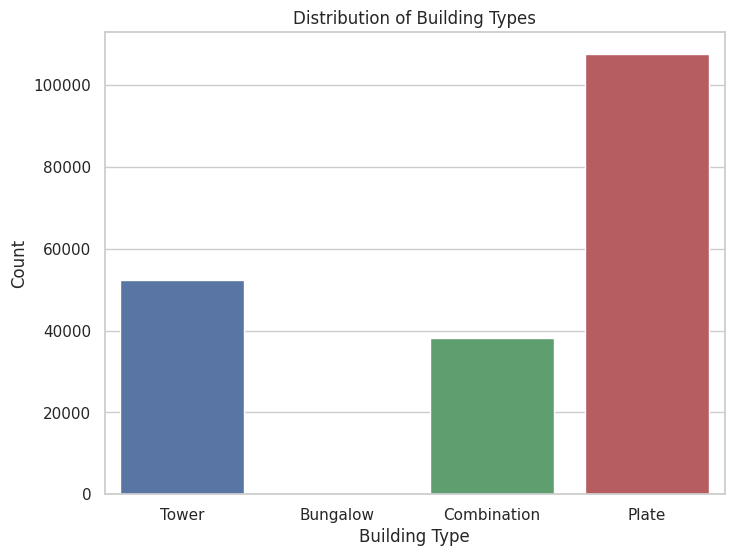

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x='buildingType', data=house)

plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Tower', 'Bungalow', 'Combination', 'Plate'])

plt.show()

**Insights:**

The bar chart illustrates the distribution of different building types in the dataset. We can observe that:

- Plate buildings are the most common type in the dataset, significantly outnumbering the other types, which suggests that this type of construction is the most prevalent in the housing market within the dataset's geographical scope, possibly due to its popularity and unique characteristics in residential developments.

- Tower and combination buildings are also very common, indicating that high-rise living accommodations are also a significant portion of the housing market.

- Bungalow are much less common in Beijing, suggesting this type of buildings are less frequently constructed or sold in the area of study. As we mentioned above, this could be due to the larger land area required for such properties, which is less available in urban settings.

Text(0, 0.5, 'Total Price')

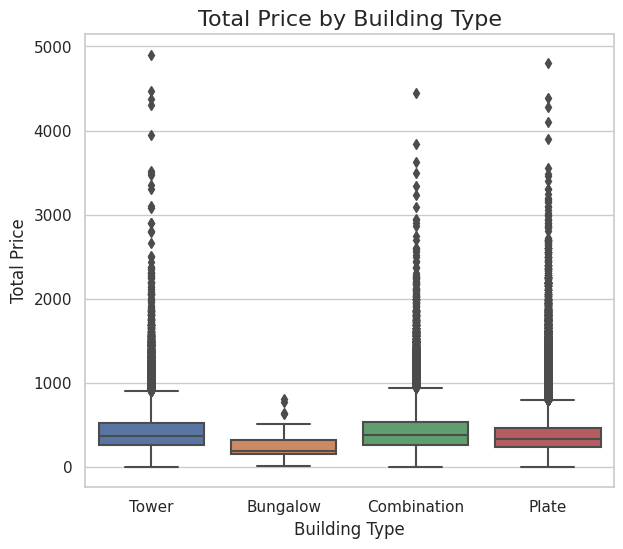

In [ ]:
# Boxplot of 'price' by 'buildingType'
plt.figure(figsize=(15,20))
plt.subplot(3, 2, 4)
sns.boxplot(x=house['buildingType'], y=house['totalPrice'])
plt.title('Total Price by Building Type',fontsize=16)
plt.xlabel('Building Type', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Tower', 'Bungalow', 'Combination', 'Plate'])

plt.ylabel('Total Price', fontsize=12)

**Insights:**

The boxplot illustrates the distribution of total prices for different building types. From the box plot above we can observe that:

- Combination has the highest median and quartile prices, which indicates that this type of house has a higher average price across all building types, suggesting that it may have unique characteristics or be more popular in the market. Also, there are outliers for Combination buildings, indicating exceptionally overpriced or underpriced homes.

- For other types, there is no significant differences, which reflects the relative price stability of these more common types of housing. These types of housing are likely to be more concentrated in conventional residential areas of the city, where supply and demand are relatively balanced and home prices are less volatile.



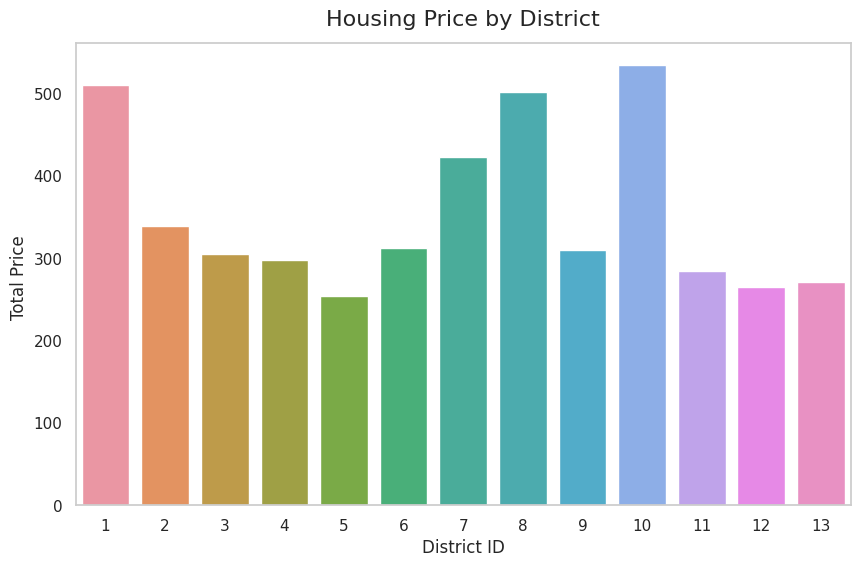

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=house['district'], y=house['totalPrice'], ci=None)
plt.title('Housing Price by District', fontsize=16, y=1.02)
plt.xlabel('District ID', fontsize=12)
plt.ylabel('Total Price ', fontsize=12)
plt.grid(axis='y')

plt.show()

**Insights:**

The barplot shows us that:

- There is a clear variation in average housing prices across different districts. This indicates that location is a significant factor in housing prices in Beijing.

- District 10 has the highest average price per square unit, Districts 1, 7, and 8 have moderately priced housing compared to the rest.

- The rest show relative low and similar average pricing, suggesting these areas might have similar housing characteristics or desirability in the real estate market.

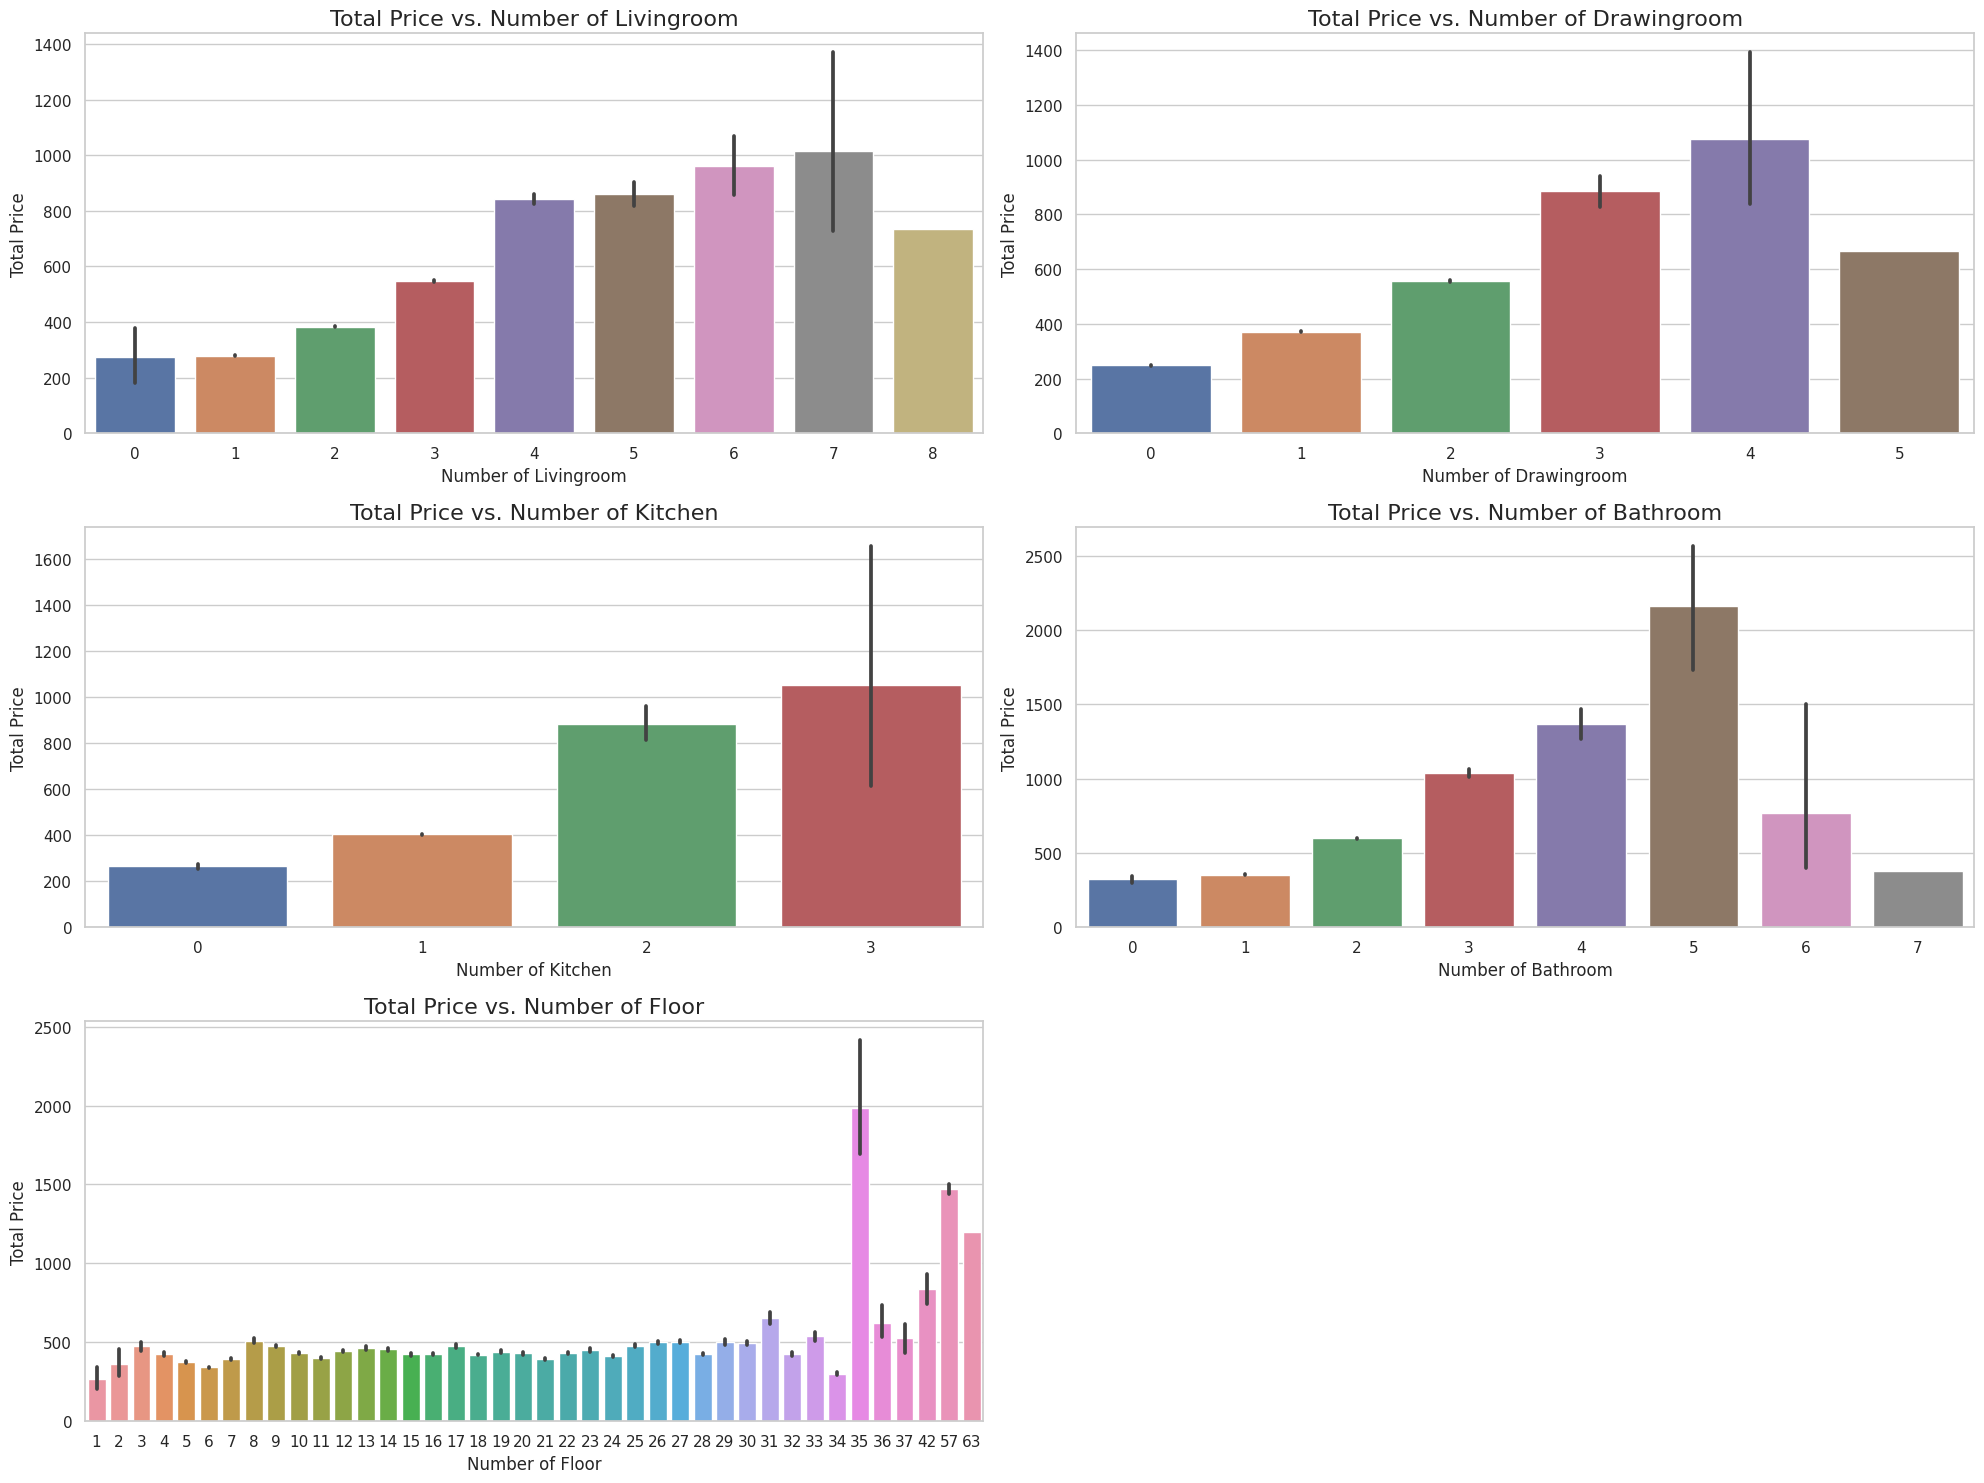

In [ ]:
# List of features to plot against 'Price'
features = ['livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor']

# Set up the matplotlib figure - adjust the size as necessary
plt.figure(figsize=(20, 15))

# Loop through the features list and create a subplot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x=house[feature], y=house['totalPrice'])
    plt.title(f'Total Price vs. Number of {feature.capitalize()}', fontsize=16)
    plt.xlabel(f'Number of {feature.capitalize()}', fontsize=12)
    plt.ylabel('Total Price', fontsize=12)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()


**Insights:**

All the charts above illustrate that:

- Overall, while the number of rooms usually implies a higher price, the benefits diminish or become more uncertain beyond a certain point.

- In addition, these charts show that the relationship between floors and prices is uncertain and complex, with some floors being much more expensive, but tehre is no obvious relationships or patterns. With the exception of the first floor and particularly high floors in skyscraper buildings (such as floors higher than 40), which may be priced higher due to their convenience and better views, we didn't see any significant effect that floors might have on prices.


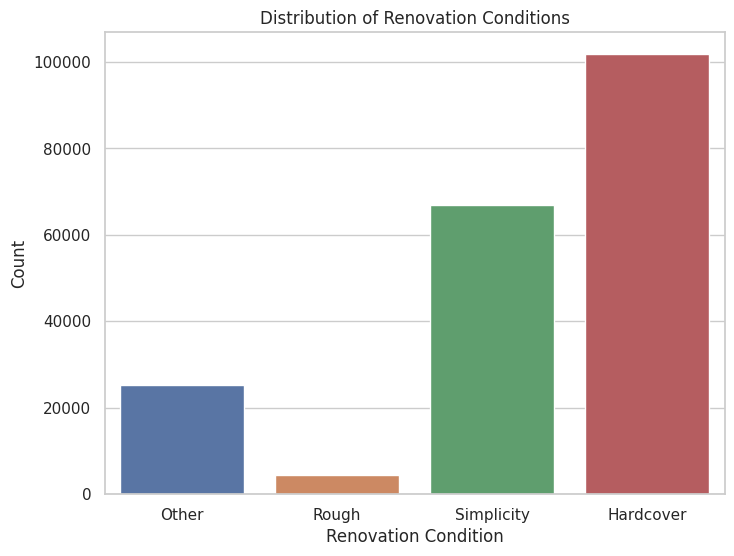

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x='renovationCondition', data=house)

plt.title('Distribution of Renovation Conditions')
plt.xlabel('Renovation Condition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Other', 'Rough', 'Simplicity', 'Hardcover'])
plt.show()

**Insights:**

This bar chart shows the count of properties classified by their renovation condition. We can observe that:

- Hardcover renovation is the most common by a significant margin, suggesting that many properties on the market are being sold with complete and possibly high-quality finishes. This might reflect a preference for move-in ready homes.

- Simplicity is the second most common condition, indicating a fair number of properties are presented with a basic or functional level of finish that might appeal to buyers looking to customize their space or who are seeking a more budget-friendly option.

- Rough and other conditions are less frequent. Rough might refer to properties that are in need of renovation or are perhaps sold as shells, which provides the buyers with the opportunity to renovate according to their own tastes and requirements. ther could encompass a variety of conditions not specified by the main categories, and its lower frequency suggests that most properties fall into the standard classifications of renovation conditions.

The prevalence of hardcover renovations indicates that the market might be competitive, pushing sellers to invest in the condition of their property before selling. It also suggests that there is a significant demand for properties that do not require additional work post-purchase.

---

# V. Setup the Prepocess Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(display='diagram')

# Separate features and target
X = house.drop(['totalPrice','price'], axis=1)

# Target for regression model
y_regression = house['totalPrice']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Create transformers for datetime columns
class DatetimeFeaturesExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col + '_year'] = X[col].dt.year
            X[col + '_month'] = X[col].dt.month
            X[col + '_day'] = X[col].dt.day
        # Drop the original datetime columns
        X.drop(columns=X.select_dtypes(include=['datetime64']).columns, inplace=True)
        return X

    def get_feature_names_out(self, input_features=None):
        feature_names = []
        for col in input_features:
            feature_names.extend([col + '_year', col + '_month', col + '_day'])
        return feature_names

# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

datetime_transformer = Pipeline(steps=[
    ('datetime_extractor', DatetimeFeaturesExtractor())
])

# ColumnTransformer for applying transformations to the respective columns
prep_pipeline = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('datetime', datetime_transformer, datetime_cols)
    ])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'ladderRatio', 'communityAverage'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['buildingType', 'renovationCondition', 'buildingStructure', 'elevator',
       'fiveYearsProperty', 'subway', 'district'],
      dtype='object')),
                                ('datetime',
                                 Pipeline(steps=[('datetime_extractor',
                                                  DatetimeFeaturesExtractor())]),
                                 Index(['tradeTime'], dtype='object'))])

In [ ]:
# Preprocessing the data
X_preprocessed = prep_pipeline.fit_transform(X)

numerical_feature_names = list(numerical_cols)
categorical_feature_names = list(prep_pipeline.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))
datetime_feature_names = list(prep_pipeline.named_transformers_['datetime'].get_feature_names_out(datetime_cols))

# Combine all feature names
feature_names = numerical_feature_names + categorical_feature_names + datetime_feature_names

print(feature_names)

['square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'ladderRatio', 'communityAverage', 'buildingType_1.0', 'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0', 'renovationCondition_1', 'renovationCondition_2', 'renovationCondition_3', 'renovationCondition_4', 'buildingStructure_1', 'buildingStructure_2', 'buildingStructure_3', 'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6', 'elevator_0.0', 'elevator_1.0', 'fiveYearsProperty_0.0', 'fiveYearsProperty_1.0', 'subway_0.0', 'subway_1.0', 'district_1', 'district_2', 'district_3', 'district_4', 'district_5', 'district_6', 'district_7', 'district_8', 'district_9', 'district_10', 'district_11', 'district_12', 'district_13', 'tradeTime_year', 'tradeTime_month', 'tradeTime_day']


In [ ]:
# Splitting the data for the regression model
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_preprocessed, y_regression, test_size=0.2, random_state=42)

---

# VI. Feature Selection


For regression, we can use a approach with linear models that support L1 regularization:

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# For Regression
lasso_cv = LassoCV(cv=5, random_state=42).fit(X_train_reg, y_train_reg)

threshold =0.45 * np.abs(lasso_cv.coef_).mean()

model_lasso = SelectFromModel(lasso_cv, prefit=True, threshold=threshold)

X_train_reg = model_lasso.transform(X_train_reg)
X_test_reg = model_lasso.transform(X_test_reg)

# Get the mask of the features selected
selected_features_mask = model_lasso.get_support()

# Print the names of the selected features
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]
print("Selected features using L1-based model with higher threshold:", selected_feature_names)


Selected features using L1-based model with higher threshold: ['square', 'communityAverage', 'buildingType_1.0', 'buildingType_4.0', 'renovationCondition_2', 'renovationCondition_4', 'buildingStructure_6', 'elevator_0.0', 'fiveYearsProperty_0.0', 'district_1', 'district_2', 'district_5', 'district_6', 'district_7', 'district_8', 'district_9', 'district_10', 'district_11', 'district_13', 'tradeTime_year']


In [ ]:
print(len(selected_feature_names))

20


Initially, we used lasso regression for feature selection without setting any threshold, resulting in 34 features being chosen for our regression models. The outcomes indicated that nearly all models, particularly the RandomForestRegressor, exhibited exceptional performance.

However, upon further tuning, the RandomForestRegressor's effectiveness declined, suggesting the potential for overfitting due to the high number of selected features.

Subsequently, to address this issue, we introduced a threshold in the feature selection process.

This strategy successfully mitigated the overfitting problem.

---

# VII. Predicting totalPrice

### A. Linear Regression

We choose Linear Regression as a starting point due to its simplicity and interpretability. It is effective for modeling the relationship between square footage and community averages with the house price, which are likely to have a linear relationship. It also serves as a baseline to gauge the added complexity of other models.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

# Predictions
lr_predictions = lr.predict(X_test_reg)

# Evaluation
print("Linear Regression Performance:")
print("R2 Score:", r2_score(y_test_reg, lr_predictions))
print("MSE:", mean_squared_error(y_test_reg, lr_predictions))

Linear Regression Performance:
R2 Score: 0.8223860608133055
MSE: 10772.130513932714


### B. Ridge Regression

Ridge Regression is suitable when there is multicollinearity in the dataset, which can happen with features like 'district' that are related to location. The L2 regularization in Ridge Regression can address this by penalizing large coefficients and reducing overfitting.



In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge = Ridge(random_state=42, alpha=1.0)
ridge.fit(X_train_reg, y_train_reg)

# Predictions
ridge_predictions = ridge.predict(X_test_reg)

# Evaluation
print("\nRidge Regression Performance:")
print("R2 Score:", r2_score(y_test_reg, ridge_predictions))
print("MSE:", mean_squared_error(y_test_reg, ridge_predictions))



Ridge Regression Performance:
R2 Score: 0.8223859032056755
MSE: 10772.14007269802


### C. Decision Tree Regressor

Decision Trees are beneficial for handling the categorical and ordinal features like building type, renovation condition, and the district codes. Decision trees can capture the non-linear and hierarchical interactions between these categorical features and the target variable, offering a model that can adapt to the complex decision-making process that often characterizes real estate pricing.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_reg, y_train_reg)

# Predictions
dt_predictions = dt.predict(X_test_reg)

# Evaluation
print("\nDecision Tree Performance:")
print("R2 Score:", r2_score(y_test_reg, dt_predictions))
print("MSE:", mean_squared_error(y_test_reg, dt_predictions))


Decision Tree Performance:
R2 Score: 0.8648835079309626
MSE: 8194.697408419732


### D. Random Forest Regressor

Random Forest builds upon the capabilities of decision trees by creating an ensemble that averages out errors, reduces variance, and prevents overfitting. It's particularly adept at handling a mix of different types of data and is robust to outliers, making it well-suited for real estate datasets that often contain extreme values.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_reg, y_train_reg)

# Predictions
rf_predictions = rf.predict(X_test_reg)

# Evaluation
print("\nRandom Forest Performance:")
print("R2 Score:", r2_score(y_test_reg, rf_predictions))
print("MSE:", mean_squared_error(y_test_reg, rf_predictions))



Random Forest Performance:
R2 Score: 0.9201025197510082
MSE: 4845.712498228156


### E. Gradient Boosting Regressor

Gradient Boosting incrementally constructs an ensemble of weak decision trees with an emphasis on correcting the previous trees' errors. Given the importance of accurately modeling features such as the condition of the property and the influence of the district, Gradient Boosting can fine-tune the predictions and often provides substantial performance improvements over single decision trees, especially in the presence of noisy data.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_reg, y_train_reg)

# Predictions
gb_predictions = gb.predict(X_test_reg)

# Evaluation
print("\nGradient Boosting Performance:")
print("R2 Score:", r2_score(y_test_reg, gb_predictions))
print("MSE:", mean_squared_error(y_test_reg, gb_predictions))



Gradient Boosting Performance:
R2 Score: 0.9104035903372955
MSE: 5433.944108699419


### F. XGBoost Regressor

XGBoost further refines the boosting approach with more sophisticated regularization (L1 and L2), which can be very effective in preventing overfitting. This is crucial when models need to generalize well from complex interactions between features and not just memorize the training data. Given the temporal component ('tradeTime_year'), XGBoost can also accommodate trends over time, which might be essential for capturing market dynamics.

In [ ]:
from xgboost import XGBRegressor

# XGBoost Model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_reg, y_train_reg)

# Predictions
xgb_predictions = xgb.predict(X_test_reg)

# Evaluation
print("\nXGBoost Performance:")
print("R2 Score:", r2_score(y_test_reg, xgb_predictions))
print("MSE:", mean_squared_error(y_test_reg, xgb_predictions))



XGBoost Performance:
R2 Score: 0.9196493067633038
MSE: 4873.199470683786


Summary:

- Model Overview: Our selected models balance linear, non-linear, and hierarchical data analysis for predicting house prices. The ensemble models - **Random Forest**, **Gradient Boosting**, and **XGBoost** - boost prediction accuracy by reducing bias and variance.

- Key Findings: The Random Forest Regressor emerged as the top performer, boasting the highest R2 Score of 0.9201, and the lowest MSE of 4846. Following closely was the XGBoost Regressor, with a competitive R2 Score of 0.9165 and an MSE of 4873. The Gradient Boosting Regressor also displayed strong capabilities, recording an R2 Score of 0.9104 and an MSE of 5434. In comparison, the Decision Tree and Ridge Regression models showed lower performance levels. Regarding the Linear Regression model, despite its simplicity, proved to be quite effective, showing results comparable to those of the Ridge Regression.

- Model Strategy: The Random Forest model is good at handling overfitting, effectively reducing variance by employing multiple decision trees in its analysis. Gradient Boosting builds on this by using sequential trees, each learning from the errors of the previous one, thereby systematically decreasing bias. XGBoost takes these concepts further with its advanced regularization techniques, which not only excel in overall performance but also are particularly effective in preventing overfitting. These models collectively represent a robust approach to managing common challenges in predictive modeling. Combining these models in an ensemble leverages their strengths, mitigates weaknesses, and captures complex data patterns, as shown by high R2 Scores and lower MSEs.

However, further tuning is planned for enhanced performance before final ensemble integration.

---

# VIII. Fine Tune the Well Fitted Models

## A. Random Forest Regressor

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter distribution to search over
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metrics
scoring = {
    'R2 Score': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error)
}

# Perform separate Halving Random Searches for each metric
best_params_r2 = HalvingRandomSearchCV(
    rf,
    param_distributions=param_dist,
    scoring=scoring['R2 Score'],
    cv=5,
    factor=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
).fit(X_train_reg, y_train_reg).best_params_

best_params_mse = HalvingRandomSearchCV(
    rf,
    param_distributions=param_dist,
    scoring=scoring['MSE'],
    cv=5,
    factor=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
).fit(X_train_reg, y_train_reg).best_params_

# Print the best parameters
print("\nBest Parameters (R2 Score):", best_params_r2)
print("Best Parameters (MSE):", best_params_mse)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 9
min_resources_: 10
max_resources_: 158596
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 10
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 36
n_resources: 30
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 12
n_resources: 90
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 4
n_resources: 270
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 810
Fitting 5 folds for each of 2 candidates, totalling 10 fits
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 9
min_resources_: 10
max_resources_: 158596
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 10
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_

In [ ]:
# Use the best parameters to train the final model
best_rf_model_hr1 = RandomForestRegressor(random_state=42, **best_params_r2)
best_rf_model_hr1.fit(X_train_reg, y_train_reg)

# Make predictions with the best model
best_rf_predictions_hr1 = best_rf_model_hr1.predict(X_test_reg)

# Evaluate the best model
print("\nBest Random Forest Performance (Halving Random Search):")
print("R2 Score:", r2_score(y_test_reg, best_rf_predictions_hr1))
print("MSE:", mean_squared_error(y_test_reg, best_rf_predictions_hr1))


Best Random Forest Performance (Halving Random Search):
R2 Score: 0.9141119504092801
MSE: 5209.035304407398


In [ ]:
# Use the best parameters to train the final model
best_rf_model_hr2 = RandomForestRegressor(random_state=42, **best_params_mse)
best_rf_model_hr2.fit(X_train_reg, y_train_reg)

# Make predictions with the best model
best_rf_predictions_hr2 = best_rf_model_hr2.predict(X_test_reg)

# Evaluate the best model
print("\nBest Random Forest Performance (Halving Random Search):")
print("R2 Score:", r2_score(y_test_reg, best_rf_predictions_hr2))
print("MSE:", mean_squared_error(y_test_reg, best_rf_predictions_hr2))


Best Random Forest Performance (Halving Random Search):
R2 Score: 0.9228745130698399
MSE: 4677.593520906118


### **Visualize the Best Results**

Best Random Forest Performance (Halving Random Search):

Best Parameters (MSE): {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}

R2 Score: 0.9228610431270251

MSE: 4678.410461190657

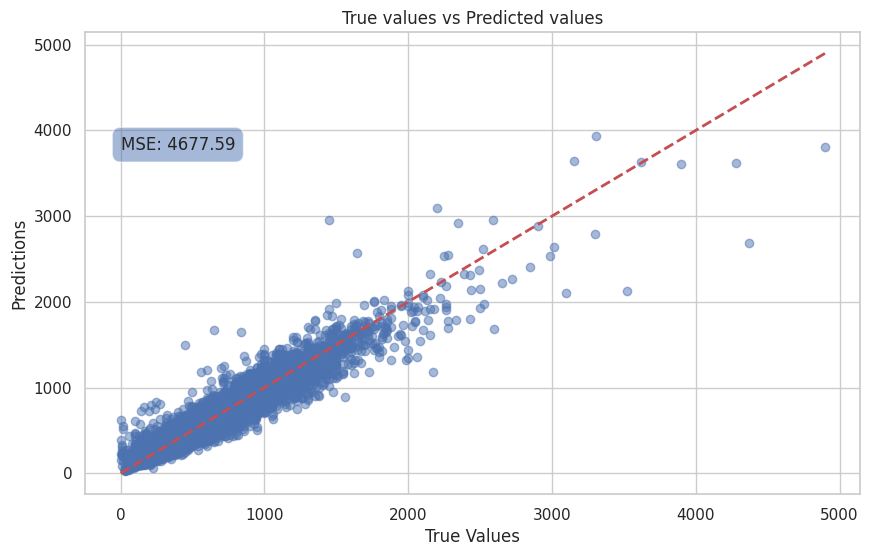

In [ ]:
# Calculate the MSE
mse = mean_squared_error(y_test_reg, best_rf_predictions_hr2)

# Create a scatter plot of the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, best_rf_predictions_hr2, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r', linewidth=2)
plt.title('True values vs Predicted values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.text(x=np.min(y_test_reg), y=np.max(best_rf_predictions_hr2), s=f'MSE: {mse:.2f}', fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.5))

plt.show()

## B. Gradient Boosting Regressor

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define the parameter distribution to search over
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metrics
scoring = {
    'R2 Score': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error)
}

# Perform separate Halving Random Searches for each metric
best_params_r2 = HalvingRandomSearchCV(
    gb,
    param_distributions=param_dist,
    scoring=scoring['R2 Score'],
    cv=5,
    factor=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
).fit(X_train_reg, y_train_reg).best_params_

best_params_mse = HalvingRandomSearchCV(
    gb,
    param_distributions=param_dist,
    scoring=scoring['MSE'],
    cv=5,
    factor=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
).fit(X_train_reg, y_train_reg).best_params_

# Print the best parameters
print("\nBest Parameters (R2 Score):", best_params_r2)
print("Best Parameters (MSE):", best_params_mse)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 9
min_resources_: 10
max_resources_: 158596
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 10
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 36
n_resources: 30
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 12
n_resources: 90
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 4
n_resources: 270
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 810
Fitting 5 folds for each of 2 candidates, totalling 10 fits
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 9
min_resources_: 10
max_resources_: 158596
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 10
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_

In [ ]:
# Use the best parameters to train the final model
best_gb_model_hr1= GradientBoostingRegressor(random_state=42, **best_params_r2)
best_gb_model_hr1.fit(X_train_reg, y_train_reg)

# Make predictions with the best model
best_gb_predictions_hr1 = best_gb_model_hr1.predict(X_test_reg)

# Evaluate the best model
print("\nBest GB Performance (Halving Random Search):")
print("R2 Score:", r2_score(y_test_reg, best_gb_predictions_hr1))
print("MSE:", mean_squared_error(y_test_reg, best_gb_predictions_hr1))


Best GB Performance (Halving Random Search):
R2 Score: 0.9216140573759897
MSE: 4754.0390594903


In [ ]:
# Use the best parameters to train the final model
best_gb_model_hr2 = GradientBoostingRegressor(random_state=42, **best_params_mse)
best_gb_model_hr2.fit(X_train_reg, y_train_reg)

# Make predictions with the best model
best_gb_predictions_hr2 = best_gb_model_hr2.predict(X_test_reg)

# Evaluate the best model
print("\nBest Random Forest Performance (Halving Random Search):")
print("R2 Score:", r2_score(y_test_reg, best_gb_predictions_hr2))
print("MSE:", mean_squared_error(y_test_reg, best_gb_predictions_hr2))


Best Random Forest Performance (Halving Random Search):
R2 Score: 0.8954962774397333
MSE: 6338.059635216621


### **Visualize the Best Results**

Best GB Performance (Halving Random Search):

Best Parameters (R2 Score): {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}

R2 Score: 0.9216799069506427

MSE: 4750.045340215241

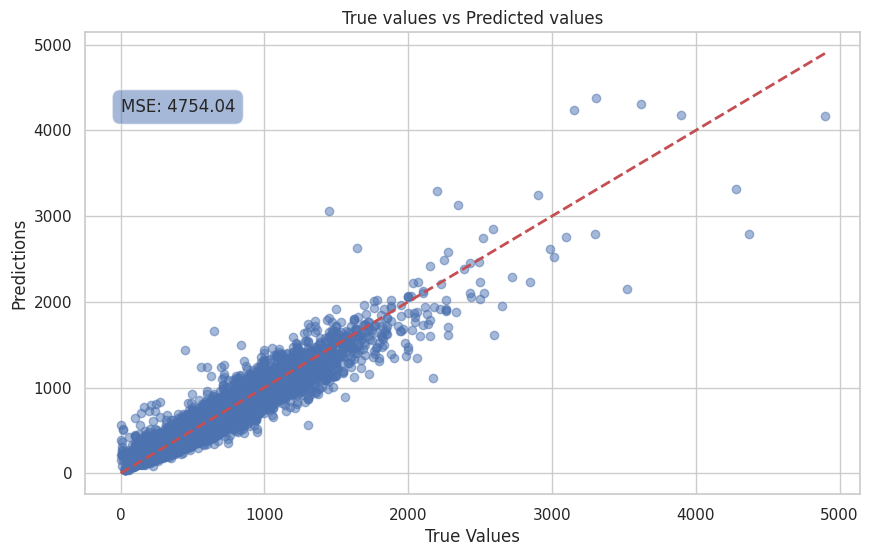

In [ ]:
# Calculate the MSE
mse = mean_squared_error(y_test_reg, best_gb_predictions_hr1)

# Create a scatter plot of the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, best_gb_predictions_hr1, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r', linewidth=2)
plt.title('True values vs Predicted values')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.text(x=np.min(y_test_reg), y=np.max(best_gb_predictions_hr1), s=f'MSE: {mse:.2f}', fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.5))

plt.show()

## C.XGBoost Regressor

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# XGBoost Model
xgb = XGBRegressor(random_state=42)

# Define the parameter distribution to search over
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metrics
scoring = {
    'R2 Score': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error)
}

# Perform separate Halving Random Searches for each metric
best_params_r2 = HalvingRandomSearchCV(
    xgb,
    param_distributions=param_dist,
    scoring=scoring['R2 Score'],
    cv=5,
    factor=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
).fit(X_train_reg, y_train_reg).best_params_

best_params_mse = HalvingRandomSearchCV(
    xgb,
    param_distributions=param_dist,
    scoring=scoring['MSE'],
    cv=5,
    factor=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
).fit(X_train_reg, y_train_reg).best_params_


# Print the best parameters
print("\nBest Parameters (R2 Score):", best_params_r2)
print("Best Parameters (MSE):", best_params_mse)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 9
min_resources_: 10
max_resources_: 158596
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 10
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 36
n_resources: 30
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 12
n_resources: 90
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 4
n_resources: 270
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 810
Fitting 5 folds for each of 2 candidates, totalling 10 fits
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 9
min_resources_: 10
max_resources_: 158596
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 10
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_

In [ ]:
# Use the best parameters to train the final model
best_xgb_model_hr1 = XGBRegressor(random_state=42, **best_params_r2)
best_xgb_model_hr1.fit(X_train_reg, y_train_reg)

# Make predictions with the best model
best_xgb_predictions_hr1 = best_xgb_model_hr1.predict(X_test_reg)

# Evaluate the best model
print("\nBest XGBoost Regressor Performance (Halving Random Search):")
print("R2 Score:", r2_score(y_test_reg, best_xgb_predictions_hr1))
print("MSE:", mean_squared_error(y_test_reg, best_xgb_predictions_hr1))


Best XGBoost Regressor Performance (Halving Random Search):
R2 Score: 0.9151259673785497
MSE: 5147.5360595489565


In [ ]:
# Use the best parameters to train the final model
best_xgb_model_hr2 = XGBRegressor(random_state=42, **best_params_mse)
best_xgb_model_hr2.fit(X_train_reg, y_train_reg)

# Make predictions with the best model
best_xgb_predictions_hr2 = best_xgb_model_hr2.predict(X_test_reg)

# Evaluate the best model
print("\nBest XGBoost Regressor Performance (Halving Random Search):")
print("R2 Score:", r2_score(y_test_reg, best_xgb_predictions_hr2))
print("MSE:", mean_squared_error(y_test_reg, best_xgb_predictions_hr2))


Best XGBoost Regressor Performance (Halving Random Search):
R2 Score: 0.9211263815970654
MSE: 4783.6161701782985


### **Visualize the Best Results**

Best XGBoost Regressor Performance (Halving Random Search):

Best Parameters (MSE): {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}

R2 Score: 0.9211263815970654

MSE: 4783.6161701782985

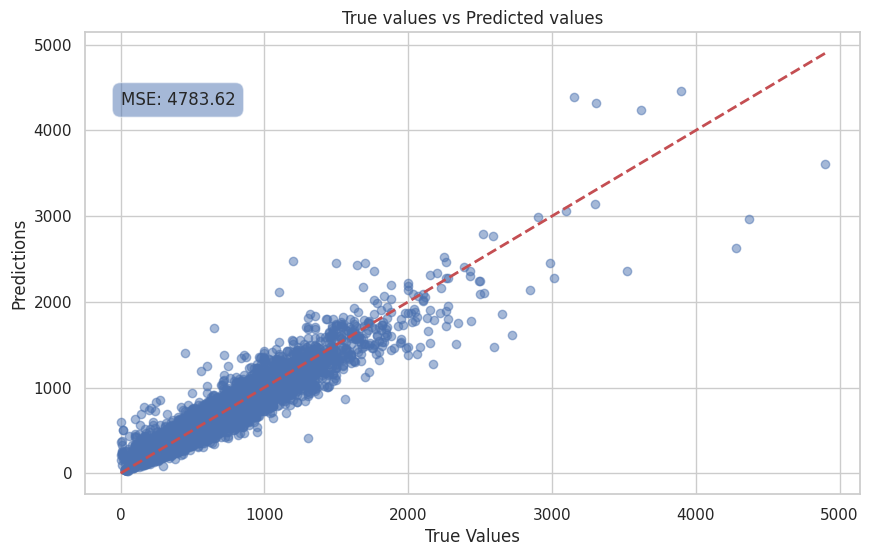

In [ ]:
# Calculate the MSE
mse = mean_squared_error(y_test_reg, best_xgb_predictions_hr2)

# Create a scatter plot of the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, best_xgb_predictions_hr2, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r', linewidth=2)
plt.title('True values vs Predicted values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.text(x=np.min(y_test_reg), y=np.max(best_xgb_predictions_hr2), s=f'MSE: {mse:.2f}', fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.5))

plt.show()

**Summary:**

- Improvement in R2 Score: Each of the models has shown an improvement in the R2 score after tuning. This indicates that the fine-tuning process has made the models more capable of explaining the variance in the house prices. The Random Forest model improved slightly from 0.9201 to 0.9229, the Gradient Boosting model had a notable increase from 0.9104 to 0.9217, and the XGBoost model also saw an increase from 0.9196 to 0.9211. These improvements suggest that the parameter adjustments have led to models that fit the training data better without overfitting.

- Decrease in MSE: The Mean Squared Error (MSE) has decreased for all models, which implies that the average squared difference between the predicted and actual house prices has been reduced. The Random Forest's MSE reduced from 4846 to 4678, Gradient Boosting's MSE decreased from 5434 to 4750, and XGBoost's MSE dropped from 4873 to 4784. A lower MSE is indicative of a model making more precise predictions.



---



# IX. Ensemble

## A. Stacking

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

base_models = [
    ('rf',  andom_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=10, random_state=42))
]

meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train_reg, y_train_reg)
stacking_predictions = stacking_model.predict(X_test_reg)

# Evaluation
print("R2 Score:", r2_score(y_test_reg, stacking_predictions))
print("MSE:", mean_squared_error(y_test_reg, stacking_predictions))


R2 Score: 0.92603208703324
MSE: 4486.089413757251


The stacking model has achieved an R2 score of approximately 0.926, which indicates a strong predictive power, explaining around 92.6% of the variance in the target variable (house prices). The MSE of 4486.09 indicates the average squared error of the model's predictions. This score is relatively low, suggesting that the model's predictions are, on average, quite close to the actual values. The stacking approach seems to successfully blend the strengths of the individual models, resulting in a robust model with high predictive accuracy.

### **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation for R2 score
cv_r2_scores = cross_val_score(stacking_model, X_train_reg, y_train_reg, cv=5, scoring='r2')

# Perform 5-fold cross-validation for MSE
cv_mse_scores = cross_val_score(stacking_model, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_mse_scores = -cv_mse_scores

# Print the cross-validation MSE scores and their mean
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Average Cross-Validation MSE:", np.mean(cv_mse_scores))


Cross-Validation MSE Scores: [4491.20669767 4543.61322316 4510.78066642 4422.65665714 4518.58793604]
Average Cross-Validation MSE: 4497.369036085719


In [ ]:
# Print the cross-validation R2 scores and their mean
print("Cross-Validation R2 Scores:", cv_r2_scores)
print("Average Cross-Validation R2 Score:", np.mean(cv_r2_scores))

Cross-Validation R2 Scores: [0.92146852 0.92538345 0.92620941 0.92379229 0.92592477]
Average Cross-Validation R2 Score: 0.9245556890802316


Cross-validation was performed to assess the model's stability and its generalization ability. The cross-validation R2 scores are quite consistent, around 0.92, which demonstrates the model's reliable performance across different subsets of the data. The small variation in the R2 scores across folds indicates that the model is not overly sensitive to the specific splits of the data, which is an excellent sign of its reliability.

The MSE scores from cross-validation are also fairly consistent, with an average MSE of around 4497.36. This consistency across folds suggests that the model is stable and its predictions are reliable regardless of the specific cross-validation split. The slight variations in MSE across the folds could be due to the differences in the data splits or the presence of outliers.


## B. Voting

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Define the base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=None, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=10, random_state=42))
]

# Create the Voting ensemble
voting_model = VotingRegressor(estimators=base_models)

# Fit the model
voting_model.fit(X_train_reg, y_train_reg)

# Make predictions
voting_predictions = voting_model.predict(X_test_reg)

# Evaluate the model
print("R2 Score:", r2_score(y_test_reg, voting_predictions))
print("MSE:", mean_squared_error(y_test_reg, voting_predictions))


R2 Score: 0.9260321291667237
MSE: 4486.0868583982065


The voting ensemble model achieved an R2 score of approximately 0.926, which is a high score reflecting the model’s strong ability to account for the variance in the house prices. The MSE of 4486.09 suggests that the predictions made by the ensemble are close to the actual values on average. This indicates that the ensemble approach, which averages the predictions of the constituent models, is effective in making precise predictions for house prices.

### **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for R2 score
cv_r2_scores = cross_val_score(voting_model, X_train_reg, y_train_reg, cv=5, scoring='r2')

# Perform 5-fold cross-validation for MSE
cv_mse_scores = cross_val_score(voting_model, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_mse_scores = -cv_mse_scores

# Print the cross-validation MSE scores and their mean
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Average Cross-Validation MSE:", np.mean(cv_mse_scores))


Cross-Validation MSE Scores: [4487.38076955 4548.77171515 4497.57196257 4428.63197979 4521.7743521 ]
Average Cross-Validation MSE: 4496.826155834866


In [ ]:
# Print the cross-validation R2 scores and their mean
print("Cross-Validation R2 Scores:", cv_r2_scores)
print("Average Cross-Validation R2 Score:", np.mean(cv_r2_scores))

Cross-Validation R2 Scores: [0.92153542 0.92529874 0.92642549 0.92368933 0.92587254]
Average Cross-Validation R2 Score: 0.9245643017835844


Cross-validation was conducted to evaluate the stability and generalization of the model. The R2 scores from cross-validation are impressively consistent, all being around 0.92, which reinforces the model's capacity to predict the house prices accurately across different subsets of the data. This suggests that the model is stable and performs well regardless of the specific partitioning of the data during the cross-validation process.

The MSE scores from cross-validation also demonstrate consistency, with an average MSE of around 4496.82. This uniformity across different folds indicates that the model’s predictions are reliable and it is likely to perform similarly on unseen data.

---

# X. Conclusion

This project delivers a dependable prediction model and strategic insights to potential users through a methodical process, which involved constructing our model as follows:

- Selecting features: After cleaning and preprocessing our data, we did feature selection. Initially, **lasso** regression selected 34 features with no threshold, leading to strong performance across models. However, further tuning revealed a decline in effectiveness, hinting at overfitting from too many features. To combat this, we implemented a threshold in feature selection, which effectively resolved the overfitting issue.

- Evaluating best models and fine-tuning: We tested six regression models: Linear Regression (LR), Ridge Regression (RR), Decision Tree (DT), **Random Forest** (RF), **Gradient Boosting** (GB), and **XGBoost** (XGB). The best performers were RF, GB, and XGB, each achieving an R2 score above 0.91 and MSE below 5500. We then fine-tuned these three models using **halving-random search**, resulting in R2 improvements of 0.02-0.1 and MSE reductions of 50-600, indicating successful model optimization.

- Ensembling: After refining our top models, we explored two ensemble methods for better performance and to combat overfitting. Firstly, we used **Stacking**, combining RF, GB, and XGB as base models with linear regression as the meta model. This significantly improved performance, yielding a 0.924 R2 score and reducing MSE to 4497 in cross-validation, outperforming all previous single models.Next, we applied the **Voting** method with the same base models. This approach closely matched Stacking's results, achieving an MSE of 4496 and an R2 score of 0.924.

Overall, we successfully created a model that effectively forecasts real estate prices in Beijing. With data on property size, community average prices, building type, renovation condition, building structure, elevator availability, five-year property status, district, and trade time, our model equips investors, buyers, and policymakers with the insights needed to navigate the ever-changing market landscape.

---

# XI. Challenges

The project encountered several limitations that affected its scope and execution.

- Overfitting: At first, our models showed better performance on the training set compared to the test set, indicating an overfitting issue. We addressed this by reducing the features selected and implementing ensemble techniques like stacking and voting. These steps led to the development of a well-functioning model with a reduced likelihood of overfitting.

- Limited Data Sources: The available data sources are limited. The data set was from 2011 to 2017. We only extract the data from 2015 to 2018, since it is limited by the platform's ability to handle a maximum of 200,000 entries. Notably, property prices are intricately linked with temporal factors, particularly in a distinct market such as Beijing. The restricted range of our dataset therefore presents considerable challenges in predicting real estate prices in different years.

- Need more comprehensive domain knowledge: All of our team members are beginners in supervised machine learning with limited domain knowledge. We spent a considerable amount of time and effort to solve the problems that arose.

- Extended Computational Duration: The computational demands of some tuning methods presented significant challenges, with some procedures taking more than 100 minutes to complete. This extended calculation duration reduces the efficiency of the modeling process and places practical constraints on the overall timeline of the project.


---

# References

1.BA810 Labs & exercises.

2.Datacamp courses.

3.Housing price in Beijing. (2018, July 7). Kaggle. https://www.kaggle.com/datasets/ruiqurm/lianjia/data

4.Lianjia. (n.d.). https://bj.lianjia.com/




*Usage of ChatGPT:

(1). help address syntax error;

(2). help us modify the code for transforming datetime column:

    class DatetimeFeaturesExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col + '_year'] = X[col].dt.year
            X[col + '_month'] = X[col].dt.month
            X[col + '_day'] = X[col].dt.day
        # Drop the original datetime columns
        X.drop(columns=X.select_dtypes(include=['datetime64']).columns, inplace=True)
        return X

    def get_feature_names_out(self, input_features=None):
        feature_names = []
        for col in input_features:
            feature_names.extend([col + '_year', col + '_month', col + '_day'])
        return feature_names

(3). help us understand some complex concepts that confused us.
